In [4]:
#!pip install tensorflow


In [5]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [6]:
#!pip install scikit-learn seaborn


In [7]:
import sklearn
import seaborn as sns

print("scikit-learn version:", sklearn.__version__)
print("seaborn version:", sns.__version__)


scikit-learn version: 1.7.0
seaborn version: 0.13.2


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [8]:
df=pd.read_csv("mutated.csv")

In [9]:
df

,Unnamed: 0,UniProt ID,Mutants,Protein Sequence,delta_G,mutated_sequence
0,0,A0A1U8PF82,wild-type,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...,2.26,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...
1,1,A0A1U8PF82,M225L,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...,0.77,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...
2,2,A0A1U8PF82,M234L,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...,1.58,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...
3,3,A0A1U8PF82,M243L,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...,2.42,MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEY...
4,4,A0A5K6WEI0,wild-type,MVCLQKYATLTAERRYFAMSKKLTAVALSLILCFGILTAGMDTARA...,2.80,MVCLQKYATLTAERRYFAMSKKLTAVALSLILCFGILTAGMDTARA...
...,...,...,...,...,...,...
2094,2103,R9S082,F124K,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,3.50,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...
2095,2104,R9S082,A131K,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,3.50,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...
2096,2105,R9S082,A131L,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,4.70,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...
2097,2106,R9S082,H37Q,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,4.80,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGQPETLEKFDK...


In [10]:
df.tail()


,Unnamed: 0,UniProt ID,Mutants,Protein Sequence,delta_G,mutated_sequence
2094,2103,R9S082,F124K,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,3.5,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...
2095,2104,R9S082,A131K,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,3.5,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...
2096,2105,R9S082,A131L,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,4.7,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...
2097,2106,R9S082,H37Q,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,4.8,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGQPETLEKFDK...
2098,2107,R9S082,V69T,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...,5.0,MGLSDGEWQLVLNVWGKVETDLAGHGQEVLIRLFKGHPETLEKFDK...


In [11]:
df.describe()


,Unnamed: 0,delta_G
count,2099.000000,2099.000000
mean,1054.626489,5.470134
std,608.611295,3.979716
min,0.000000,-3.450000
25%,530.500000,3.570000
50%,1055.000000,4.500000
75%,1581.500000,6.600000
max,2107.000000,58.200000


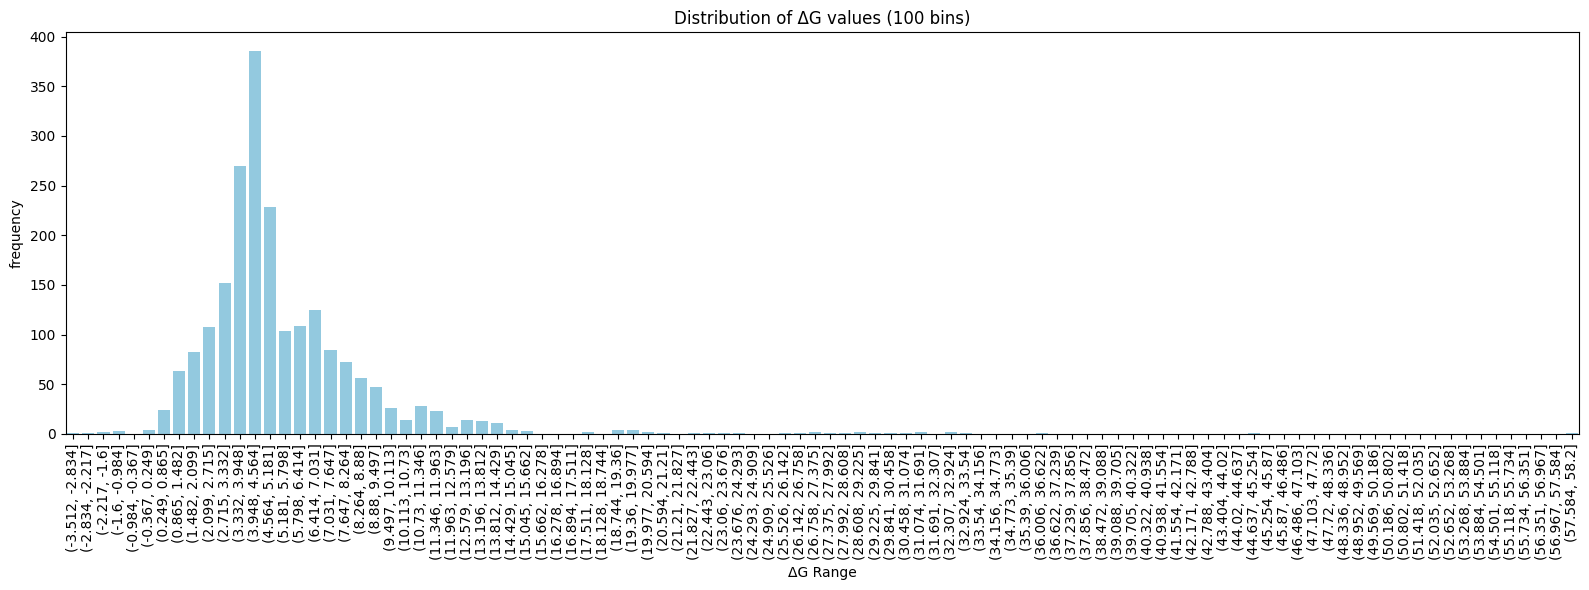

In [14]:
# Assuming df is your DataFrame and has a 'delta_G' column
df['delta_G_bin'] = pd.cut(df['delta_G'], bins=100)

# Count occurrences in each bin
bin_counts = df['delta_G_bin'].value_counts().sort_index().reset_index()
bin_counts.columns = ['delta_G_range', 'count']

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=bin_counts, x='delta_G_range', y='count', color='skyblue')

plt.xticks(rotation=90)
plt.title('Distribution of ΔG values (100 bins)')
plt.xlabel('ΔG Range')
plt.ylabel('frequency')
plt.tight_layout()
plt.savefig("deltaG_distribution.pdf", dpi=600, bbox_inches='tight')

plt.show()

In [15]:
# Save with high resolution
# 🔐 Export to PDF
plt.savefig("deltaG_distribution.pdf", dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [16]:
WT = df["Protein Sequence"]
MT = df["mutated_sequence"]
energy=df["delta_G"]

In [17]:
print(WT[0])

MAMKQVANSAIKAIANSGSSSLLTRQLHASPGSKKIVGVFYKANEYFTKNPNFVGCVEGALGLRPWLESQGHQYIVTDDKEGPDCELEKHIPDLHVLISTPFHPAYVTAERIKKAKNLQLLLTAGIGSDHVDLKAAAEAGLTVAEVTGSNVVSVAEDELMRILILVRNFVPGYHQVITGDWNVAGIAYRAYDLEGKTVGTIGAGRIGKLLLQRLKPFNCNLLYHDRVKIDPELEKQTGAKFEEDLDAMLPKCDIIVINMPLTEKTRGMFDKDRIAKMKKGVLIVNNARGAIMDTQAVADACSSGHIAGYSGDVWYPQPAPKDHPWRYMPNQAMTPHISGTTIDAQLRYAAGVKDMLERYFKGEDFPEQNYIVKAGELAPQYR


In [18]:
AA = "ACDEFRWYFQSTIKLGHMNP"
AA_index = {aa: i for i, aa in enumerate(AA)}


In [19]:
print(AA_index)

{'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 8, 'R': 5, 'W': 6, 'Y': 7, 'Q': 9, 'S': 10, 'T': 11, 'I': 12, 'K': 13, 'L': 14, 'G': 15, 'H': 16, 'M': 17, 'N': 18, 'P': 19}


In [20]:
len(AA)

20

In [21]:
import numpy as np
import pandas as pd

# Define sequence and amino acid vocabulary
sequence = "MAMKQVANA"
aa_vocab = list("ACDEFGHIKLMNPQRSTVWY")
aa_to_index = {aa: idx for idx, aa in enumerate(aa_vocab)}

# One-hot encoding
encoded_matrix = np.zeros((len(sequence), len(aa_vocab)), dtype=int)
for i, aa in enumerate(sequence):
    idx = aa_to_index.get(aa, None)
    if idx is not None:
        encoded_matrix[i, idx] = 1

# Create a labeled DataFrame
df_encoded = pd.DataFrame(encoded_matrix, columns=aa_vocab)
df_encoded.index = list(sequence)
df_encoded.index.name = "Residue"

print(df_encoded)


         A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y
Residue                                                            
M        0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
A        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
M        0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
K        0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
Q        0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
V        0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
A        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
N        0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
A        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0


Numpy is a Array based module


In [22]:
import numpy as np

matrix = np.zeros((10, 10), dtype=int)
print(matrix)


[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [23]:
matrix[1,2]

np.int64(0)

In [24]:
print(matrix.shape)

(10, 10)


In [25]:
def oneHot_Prot(protSeq):
    AA_index = {aa: i for i, aa in enumerate(AA)}
    seq= len(protSeq)
    oneHot = np.zeros(se, len(AA), dtype=int)

    for i, amino in enumerate(protseq):
        oneHot[i,oneHot[amino]]=1

In [26]:
import numpy as np

# Define global amino acid vocabulary (20 standard residues)
AA = "ACDEFGHIKLMNPQRSTVWY"
AA_index = {aa: i for i, aa in enumerate(AA)}

def oneHot_Prot(protSeq):
    protSeq = protSeq.upper()  # ensure uppercase input
    seq_len = len(protSeq)
    
    # Initialize a zero matrix of shape (sequence length x 20)
    oneHot = np.zeros((seq_len, len(AA)), dtype=int)
    
    for i, amino in enumerate(protSeq):
        idx = AA_index.get(amino)
        if idx is not None:
            oneHot[i, idx] = 1  # set the hot bit

    return oneHot


In [27]:
encoded = oneHot_Prot("AQUQDE")
print(encoded)


[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [28]:
oneHot_Prot(MT[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
#for seq in MT:
    #print(seq)


In [30]:
encode = [oneHot_Prot(i) for i in MT]

In [31]:
(encode[0]).shape

(382, 20)

In [32]:
(encode[10]).shape

(210, 20)

## In ML all the Data point should have same no of features 



In [33]:
max_len = max(len(seq) for seq in MT)
print("Maximum sequence length in MT:", max_len)


Maximum sequence length in MT: 34350


In [34]:
# Pad all sequences to the same max length
padded_seqs = pad_sequences(encode, padding='post')

In [35]:
(padded_seqs[0]).shape

(34350, 20)

In [36]:
X=np.array(padded_seqs)

In [37]:
print(X[:10])


[[[0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


## predict delta g using sequence , folding and unfolding here features are one hot encoded values which comes from the sequences. ~ In Your Pipeline:
Variable	Role	Description
X	Independent Variable (features)	Numerical representation of protein or peptide sequences (e.g., tokenized, padded, or one-hot encoded amino acid strings).
y	Dependent Variable (target)	What you're trying to predict — can be:
• ΔG: Continuous value → regression • Stability class (stable/unstable) → classification |

In [38]:
Y=np.array(energy)

In [39]:
print(Y[:10])

[ 2.26  0.77  1.58  2.42  2.8  11.4  11.23 11.39 14.41 14.73]


In [40]:
## Split the data in to train & test

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

In [42]:
X.shape

(2099, 34350, 20)

In [43]:
X_train.shape

(1469, 34350, 20)

1469 =	Number of training sequences (mutants you're training on)
34350 = Length of the longest protein sequence (after padding)
20 = One-hot dimension for each amino acid (based on "ACDEFGHIKLMNPQRSTVWY")

In [44]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [45]:
X_test.shape

(504, 34350, 20)

In [46]:
y_train.shape

(1469,)

## CNN '(CONVOLUTION NEURAL NETWORK)'
* Components of CNN

In [47]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [51]:
%cd Delta-G-Prediction

C:\Users\pranjal\Delta-G-Prediction


C:\Users\pranjal\anaconda3\envs\pythonProject1\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [52]:
# # Print the shapes of the datasets
print("Training data shapes:", X_train.shape, y_train.shape)
print("Validation data shapes:", X_val.shape, y_val.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Training data shapes: (1469, 34350, 20) (1469,)
Validation data shapes: (126, 34350, 20) (126,)
Test data shapes: (504, 34350, 20) (504,)


In [53]:
# Set the input shape and number of classes (1 for regression)
input_shape = (X_train.shape[1:])
num_classes = 1

In [54]:
# Set the input shape and number of classes (1 for regression)
input_shape = (X_train.shape[1:])
num_classes = 1

# Create the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='linear'))  # Using 'linear' activation for regression

# Compile the model with appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Apply learning rate scheduling
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Train the model using the training dataset and validate on the validation set
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])

C:\Users\pranjal\anaconda3\envs\pythonProject1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 44.3973 - val_loss: 12.3800 - learning_rate: 0.0010
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 14.1374 - val_loss: 11.5542 - learning_rate: 0.0010
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 11.3902 - val_loss: 9.3934 - learning_rate: 0.0010
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 13.4281 - val_loss: 9.3643 - learning_rate: 0.0010
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - loss: 8.6945 - val_loss: 5.7388 - learning_rate: 0.0010
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 7.6811 - val_loss: 7.7420 - learning_rate: 0.0010
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 8.8694 - val_loss: 10.4750 - learning_rate: 0.0010
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 14.3984 - val_loss: 5.1557 - learning_rate: 0.0010
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 9.9840 - val_loss: 5.6444 - learning_rate: 0.0010
Epoch 10/10

In [55]:
# Assuming you have predictions and true values as numpy arrays
prediction = model.predict(X_test)
y_true = np.array(y_test)  # True delta_G values for the test data
y_pred = prediction.reshape(-1)  # Reshape predictions to a 1D array if needed

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate coefficient of determination (R-squared score)
r2_score_value = r2_score(y_true, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2_score_value)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step
Mean Squared Error (MSE): 4.934573709533298
R-squared Score: 0.6722838170394616


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True ΔG")
plt.ylabel("Predicted ΔG")
plt.title("Prediction Accuracy")
plt.savefig("Prediction Accuracy.pdf", dpi=600, bbox_inches='tight')

plt.show()

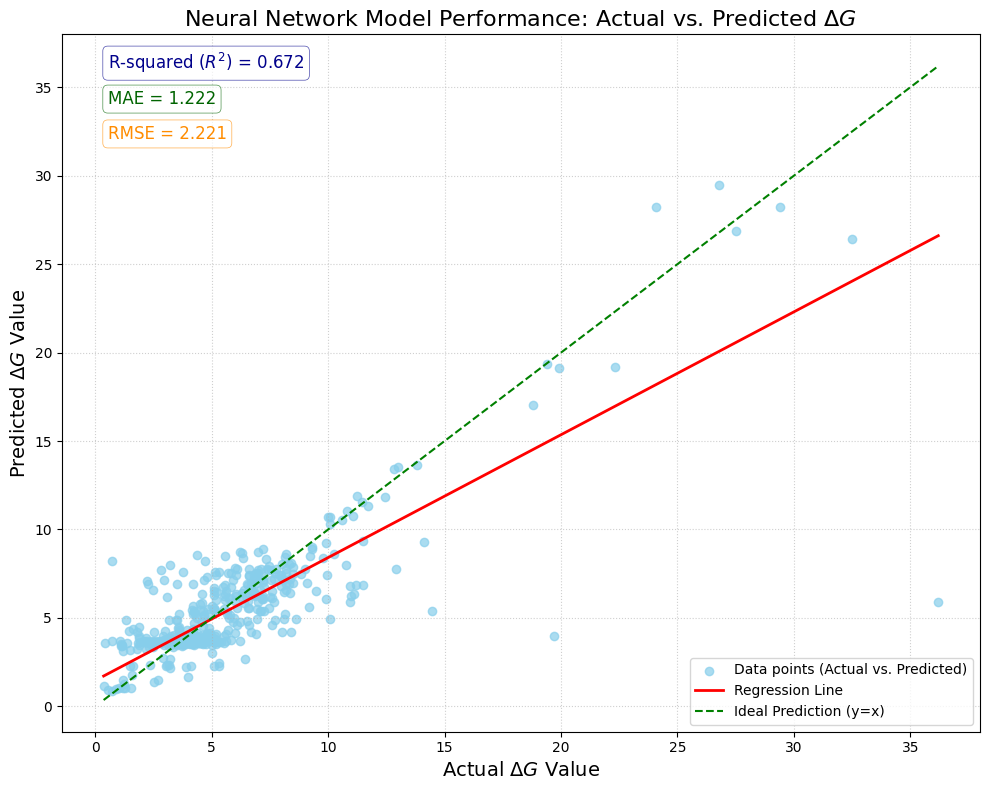

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



np.random.seed(42) # for reproducibility




# --- 2. Calculate Regression Line and R-squared ---
# Calculate the slope and intercept of the best-fit line
regression_line = np.polyfit(y_true, y_pred, 1)
regression_fn = np.poly1d(regression_line)

# Calculate the R-squared value
r2 = r2_score(y_true, y_pred)

# Calculate other common metrics for regression
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error

# --- 3. Create the Scatter Plot with Enhancements ---
plt.figure(figsize=(10, 8)) # Slightly larger figure for better readability

# Scatter plot of actual vs. predicted values
plt.scatter(y_true, y_pred, color='skyblue', alpha=0.7, label='Data points (Actual vs. Predicted)')

# Plot the regression line
# We use a range from the min to max of y_true for the regression line for better fit visualization
x_range = np.array([min(y_true), max(y_true)])
plt.plot(x_range, regression_fn(x_range), color='red', linestyle='-', linewidth=2, label='Regression Line')

# Plot the ideal 'y=x' line (perfect prediction)
plt.plot(x_range, x_range, color='green', linestyle='--', linewidth=1.5, label='Ideal Prediction (y=x)')

# Annotate with R-squared value and other metrics
# Position annotations carefully to avoid overlap
plt.annotate(f'R-squared ($R^2$) = {r2:.3f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, color='darkblue',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkblue", lw=0.5, alpha=0.7))
plt.annotate(f'MAE = {mae:.3f}',
             xy=(0.05, 0.90), xycoords='axes fraction',
             fontsize=12, color='darkgreen',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkgreen", lw=0.5, alpha=0.7))
plt.annotate(f'RMSE = {rmse:.3f}',
             xy=(0.05, 0.85), xycoords='axes fraction',
             fontsize=12, color='darkorange',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkorange", lw=0.5, alpha=0.7))


plt.xlabel('Actual $\\Delta G$ Value', fontsize=14)
plt.ylabel('Predicted $\\Delta G$ Value', fontsize=14)
plt.title('Neural Network Model Performance: Actual vs. Predicted $\\Delta G$', fontsize=16)
plt.legend(fontsize=10)

plt.grid(True, linestyle=':', alpha=0.6) # Lighter grid lines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig("Prediction Accuracy_1.pdf", dpi=600, bbox_inches='tight')
plt.show()


In [57]:
model.save("Protein_model.keras")

In [50]:
"""
#import tensorflow as tf
#from tensorflow.keras import layers, models

#model = models.Sequential #([
    layers.Input(shape=(34350, 20)),  # input shape: (sequence length, amino acid channels)

    layers.Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=3),

    layers.Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=3),

    layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.GlobalMaxPooling1D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1)  #  For regression output (single predicted value)
])
"""

"""
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)


test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


y_pred = model.predict(X_test)




import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True ΔG")
plt.ylabel("Predicted ΔG")
plt.title("Prediction Accuracy")
plt.savefig("Prediction Accuracy.pdf", dpi=600, bbox_inches='tight')

plt.show()


new_seq = "AQKDEFGHIQQQQQLLLLLL"  # Substitute with your actual sequence


encoded_seq = oneHot_Prot(new_seq)  # shape: (L, 20)


from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences([encoded_seq], maxlen=34350, padding='post')  # shape: (1, 34350, 20)


padded.shape

predicted_dG = model.predict(padded)
print(f"Predicted ΔG: {predicted_dG[0][0]:.3f}")


model.save("deltaG_predictor.h5")


model.save("my_model.keras")
"""

'\n#model.compile(optimizer=\'adam\', loss=\'mse\', metrics=[\'mae\'])\n\n#history = model.fit(\n    X_train, y_train,\n    epochs=25,\n    batch_size=32,\n    validation_split=0.2,\n    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]\n)\n\n\ntest_loss, test_mae = model.evaluate(X_test, y_test)\nprint("Test MSE:", test_loss)\nprint("Test MAE:", test_mae)\n\n\ny_pred = model.predict(X_test)\n\n\n\n\nimport matplotlib.pyplot as plt\nplt.scatter(y_test, y_pred, alpha=0.5)\nplt.xlabel("True ΔG")\nplt.ylabel("Predicted ΔG")\nplt.title("Prediction Accuracy")\nplt.savefig("Prediction Accuracy.pdf", dpi=600, bbox_inches=\'tight\')\n\nplt.show()\n\n\nnew_seq = "AQKDEFGHIQQQQQLLLLLL"  # Substitute with your actual sequence\n\n\nencoded_seq = oneHot_Prot(new_seq)  # shape: (L, 20)\n\n\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\n\npadded = pad_sequences([encoded_seq], maxlen=34350, padding=\'post\')  # shape: (1, 34350, 20)\n\n\npadded.sh